# Active Inference Model of Open Source Development Community

Here we'll use Active Inference to make a model of an Open Source Development Community (OSDC).

First we'll outline the model as clearly as possible, then implement that model in code.

# Model Outline

## Model Inspiration

We'll assume that the agents in the Open Source Development Community (OSDC) can be modeled as Agents of a Collective Intelligence, inspired and informed by ["An Active Inference Model of Collective Intelligence"](https://doi.org/10.3390/e23070830)
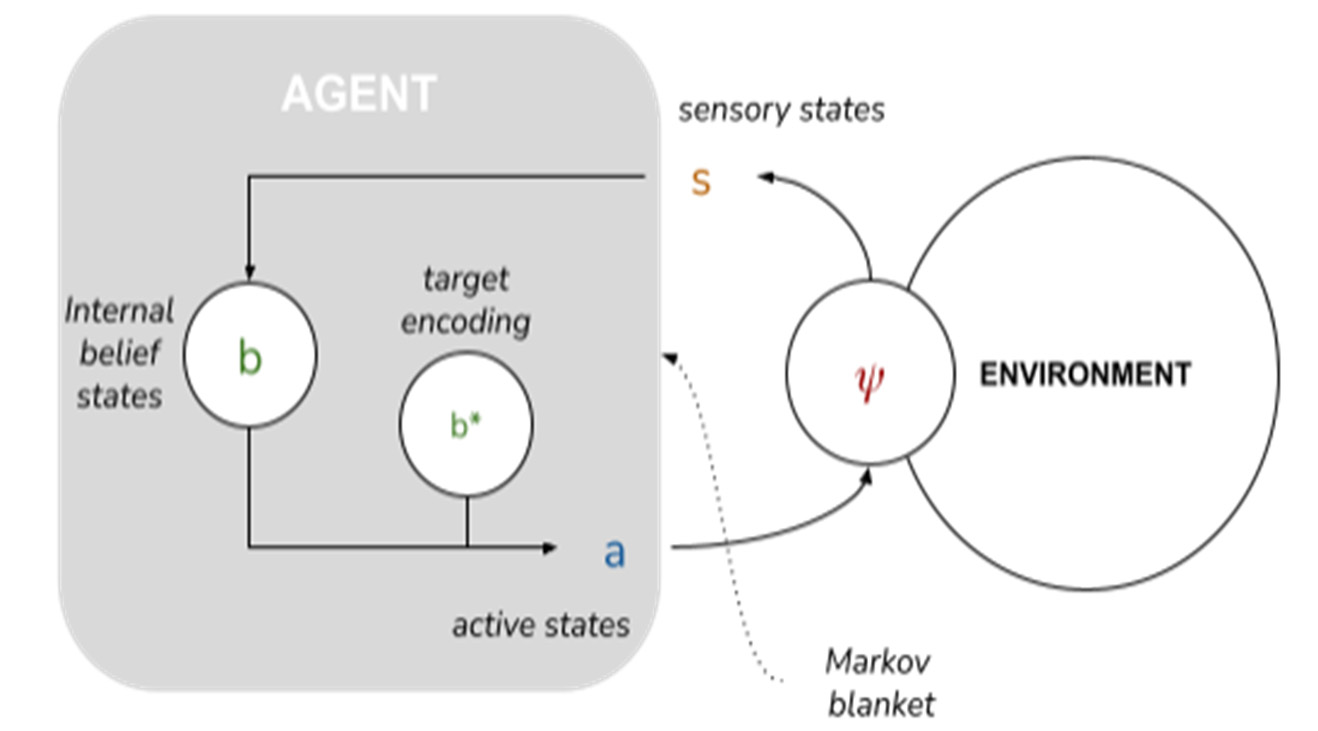


Citation:
Kaufmann, R.; Gupta, P.; Taylor, J. An Active Inference Model of Collective Intelligence. Entropy 2021, 23, 830. https://doi.org/10.3390/e23070830

Unlike many of the publicly available Active Inference (AIF) models, our model of the OSDC does not take place in any kind of physical environment, simulated or otherwise. No "grid-world" or even "motion" plays into our model of the OSDC, there are no physical analogues to what we are dealing with.

Therefore, our States and Observations for each AIF agent require a certain amount of imagination. Starting again with Kaufmann et al, (page 7, specifically), we will look at the agent's "Cognitive Capabilities" - however any mention of a 'position' will have to be construed as the agent's place in the community. Not their 'role' necessarily, but where they are in relationship to completing their goals.

Here are the "Cognitive Capabilities" from Kaufmann et al, paraphrased:
-    Beliefs about their own current position ('self-actualization loop')
-    Desires/desired beliefs about their own position relative to target positions
-    Ability to select the actions that will best 'satisfy' their desires
-    Beliefs about their partners' positions, desires, and the actions that their partners are expected to take ('Theory of Mind' or 'partner-actualization loop')
-    Ability to alter their own desires to be more compatible with their partners' ('Goal Alignment')

## OSDC Specific Model Description

### OSDC Agents and their Affordances

With an Active Inference model we don't need to be (as) reductive with our model as with other formulations of the System.

Each agent in our OSDC will have the following affordances (behaviors in AIF language):
*    Creative Affordances
     -    Commit Code
     -    Create Branch
     -    Create Issues
*    Alteration Affordances
     -    Submit Pull Request (PR)
     -    Approve PR
     -    Close Issue
     -    Delete Branch
*    Social Affordances
     -    Comment on Issue
     -    Comment on PR
     -    Request Changes on PR

### OSDC Agents and their States

The 'state' of an agent in an OSDC is again informed by Kaufmann et al's ideas about "State Space" but again, without any explicit physical environment analogue, instead using the idea of an agent's contributions.

*    External state of agent, location in the multi-dimensional space of the OSDC community of the agent's contributions
*    Sensory state of agent, perceived difference between agent's contributions and those of other agents
*    Internal belief state about its own position (actual and desired) and beliefs about the positions of other agents.
*    Action state, which affordance it is currently engaging with

### OSDC Agents and their Observations

Each agent in the OSDC has, theoretically, the same access to the same information. However, in practice, we cannot assume that all agents will look through all the code, all the issues, all the pull requests, etc. This will therefore affect the observations that each agent is afforded.

By imagining an agent's perspective, we will assume that agents whose contributions make up a more substantial part of the OSDC will be more fastidious about following up with other agents' work, especially in relation to their own.

This is part of the "contribution-location" (Beitragsort? there's always a German word for these sorts of things) which I proposed extraordinarily briefly above. We will flesh this out more soon enough, but we'll assume that an agent's observations are tied in some way to their "contribution-location" and that there is a "horizon" to that location (many contributions make up a mountain, derailing contributions make a hole).

*    Contribution-location in relation to other agents, the landscape of the OSDC
*    Code/Components which have been completed and their relationship to the shared goals of the OSDC
*    Of the affordances available, are there any which require or invite action? (Are there Open PRs which can be approved? Branches which can be merged?)

# Coding the AIF OSDC Model

## Step 1 Install pymdp and define helper/auxiliary functions

In [ ]:
!pip install inferactively-pymdp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# SOME DEFAULT AUXILIARY FUNCTIONS COPIED FROM https://pymdp-rtd.readthedocs.io/en/stable/notebooks/active_inference_from_scratch.html
def plot_likelihood(matrix, xlabels = list(range(9)), ylabels = list(range(9)), title_str = "Likelihood distribution (A)"):
    """
    Plots a 2-D likelihood matrix as a heatmap
    """

    if not np.isclose(matrix.sum(axis=0), 1.0).all():
      raise ValueError("Distribution not column-normalized! Please normalize (ensure matrix.sum(axis=0) == 1.0 for all columns)")
    
    fig = plt.figure(figsize = (6,6))
    ax = sns.heatmap(matrix, xticklabels = xlabels, yticklabels = ylabels, cmap = 'gray', cbar = False, vmin = 0.0, vmax = 1.0)
    plt.title(title_str)
    plt.show()

def plot_grid(grid_locations, num_x = 3, num_y = 3 ):
    """
    Plots the spatial coordinates of GridWorld as a heatmap, with each (X, Y) coordinate 
    labeled with its linear index (its `state id`)
    """

    grid_heatmap = np.zeros((num_x, num_y))
    for linear_idx, location in enumerate(grid_locations):
      y, x = location
      grid_heatmap[y, x] = linear_idx
    sns.set(font_scale=1.5)
    sns.heatmap(grid_heatmap, annot=True, cbar = False, fmt='.0f', cmap='crest')

def plot_point_on_grid(state_vector, grid_locations):
    """
    Plots the current location of the agent on the grid world
    """
    state_index = np.where(state_vector)[0][0]
    y, x = grid_locations[state_index]
    grid_heatmap = np.zeros((3,3))
    grid_heatmap[y,x] = 1.0
    sns.heatmap(grid_heatmap, cbar = False, fmt='.0f')

def plot_beliefs(belief_dist, title_str=""):
    """
    Plot a categorical distribution or belief distribution, stored in the 1-D numpy vector `belief_dist`
    """

    if not np.isclose(belief_dist.sum(), 1.0):
      raise ValueError("Distribution not normalized! Please normalize")

    plt.grid(zorder=0)
    plt.bar(range(belief_dist.shape[0]), belief_dist, color='r', zorder=3)
    plt.xticks(range(belief_dist.shape[0]))
    plt.title(title_str)
    plt.show()

## Step 2 Create Distributions

In [ ]:
from pymdp import utils
